### Multiple Inputs - Hidden Layers

This notebook is designed to work with multiple input layers and hidden layers.

It is intended for educational purposes to demonstrate the basic structure of a neural network.


In [171]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [172]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    for i in range(len(x)):
        x[i] = sigmoid(x[i]) * (1 - sigmoid(x[i]))
    return x

In [173]:
def row(list):
    return np.array(list).reshape(1, -1)

def column(list):
    return np.array(list).reshape(-1, 1)

In [174]:
def z(prev_a, w, b):
    return prev_a @ w + b

def c(a, y):
    return sum(((a - y) ** 2)[0])

def dc_da(a, y):
    return 2 * (a - y)

In [ ]:
def forward(x, w_list, b_list, y):
    z_list = [0 for _ in range(len(w_list))]
    a_list = [x] + [0 for _ in range(len(w_list))]
    for i in range(len(w_list)):
        z_list[i] = z(a_list[i], w_list[i], b_list[i])
        a_list[i + 1] = sigmoid(z_list[i])
    c_value = c(a_list[-1], y)
    return z_list, a_list, c_value

def backward(x, w_list, b_list, y, learning_rate=0.1):
    z_list, a_list, c_value = forward(x, w_list, b_list, y)
    dc_dw = [0 for _ in range(len(w_list))]
    dc_db = [0 for _ in range(len(b_list))]
    delta = np.identity(y.shape[0])
    dz_da_list = w_list[1:] +  [dc_da(a_list[-1], y).T]
    da_dz_list = sigmoid_derivative(z_list)
    dz_dw_list = a_list[:-1]

    for i in range(len(w_list) - 1, -1, -1):
        delta = (delta @ dz_da_list[i].T) * da_dz_list[i]
        dc_dw[i] = dz_dw_list[i].T @ delta
        dc_db[i] = np.sum(delta, axis=0).reshape(1, -1)

    for i in range(len(w_list)):
        w_list[i] -= learning_rate * dc_dw[i]
        b_list[i] -= learning_rate * dc_db[i]

    c_value = forward(x, w_list, b_list, y)[2]
    return w_list, b_list, c_value

In [176]:
def hidden(x, w_list, b_list, y, alpha, iters=100, graph=False):
    c_list = []
    c_value = forward(x, w_list, b_list, y)[2]
    c_list.append(c_value)

    for _ in range(iters):
        w_list, b_list, c_value = backward(x, w_list, b_list, y, learning_rate=alpha)
        c_list.append(c_value)

    if graph:
        plt.plot(c_list)
        plt.grid()
        plt.title('Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.yscale('log')

    _, a_value, c_value = forward(x, w_list, b_list, y)
    print('x: ', x)
    print('y: ', y)
    print('a: ', a_value[-1])
    print('Final Cost:', c_value)

x:  [[5 6]]
y:  [[0.8 0.2 0.1]]
a:  [[0.8 0.2 0.1]]
Final Cost: 3.0814879110195774e-32


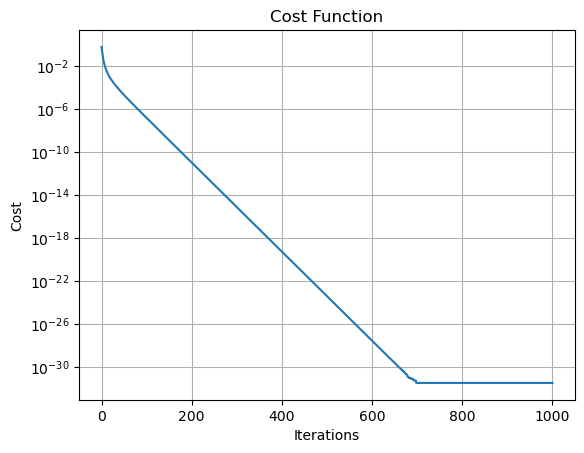

In [177]:
x = row([5, 6])
w_list = [np.array([[0.2, 0.1], [0.3, 0.4]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5], [0.1, 0.2, -0.1]])]
b_list = [row([0.4, 0.8]), row([0.5, 0.6, 0.7]), row([0.1, 0.25, 0.1])]
y = row([0.8, 0.2, 0.1])
alpha = 1

hidden(x, w_list, b_list, y, alpha, iters=1000, graph=True)

In [178]:
def makeInputs(sizes, batch_size=1):
    x = np.random.rand(batch_size, sizes[0])
    w_list = []
    b_list = []
    for i in range(len(sizes) - 1):
        w_list.append(np.random.rand(sizes[i], sizes[i + 1]))
        b_list.append(np.random.rand(1, sizes[i + 1]))
    y = np.random.rand(batch_size, sizes[len(sizes) - 1])
    alpha = random.random()
    return x, w_list, b_list, y, alpha

x:  [[0.39016575 0.95686778 0.91640813 0.40081861 0.57807547]]
y:  [[0.52014528 0.17426229]]
a:  [[0.52014528 0.17426318]]
Final Cost: 7.8022468528001e-13


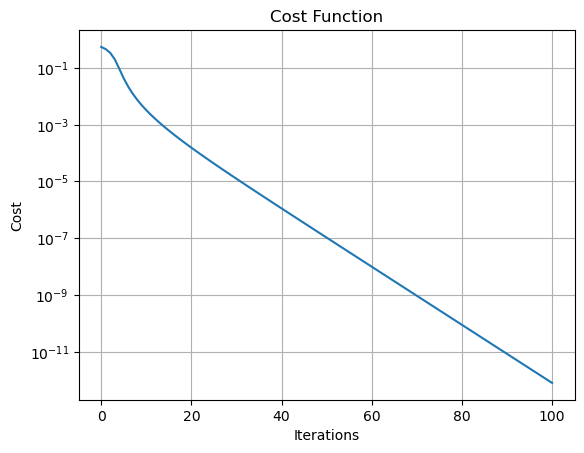

In [179]:
sizes = [5, 3, 4, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes)

hidden(x, w_list, b_list, y, 0.8, iters=100, graph=True)

500
x:  [[8.16875451e-01 7.92659456e-01]
 [9.63513877e-01 2.19604996e-01]
 [2.17470590e-01 7.66255325e-01]
 [3.28104776e-01 3.35429434e-01]
 [8.14636367e-01 4.17231147e-02]
 [6.47783139e-01 4.42764403e-01]
 [6.67494007e-01 3.47059754e-01]
 [6.92418424e-01 3.98105972e-01]
 [4.05101257e-01 3.94466718e-02]
 [3.59977193e-01 3.74858429e-01]
 [5.36530123e-02 3.39772095e-01]
 [7.01636484e-01 4.03311623e-01]
 [4.29802799e-01 2.22493515e-01]
 [8.42825724e-01 5.47955726e-01]
 [8.85552201e-01 6.51274410e-01]
 [7.19709364e-01 8.09016778e-01]
 [6.87884459e-01 6.74025205e-01]
 [3.40495469e-01 4.48342376e-01]
 [8.49598627e-01 7.67878705e-01]
 [2.76478877e-01 4.87116160e-01]
 [4.90072464e-01 9.37153839e-03]
 [1.76056941e-01 6.04886551e-01]
 [3.62188759e-02 3.86757510e-01]
 [8.26517607e-01 2.72456417e-02]
 [3.02190478e-01 8.13799185e-01]
 [5.37497384e-01 2.11880198e-01]
 [2.69321822e-01 8.07761728e-01]
 [2.66110892e-01 4.95463216e-01]
 [3.41233826e-01 3.95668509e-01]
 [1.21773577e-02 6.29652454e-01]
 [

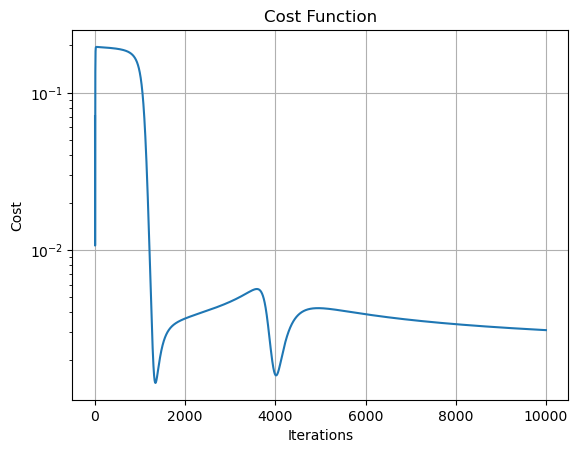

In [184]:
sizes = [2, 2, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes, 500)
y = x**2

hidden(x, w_list, b_list, y, 1, iters=10000, graph=True)

In [185]:
x = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
y = x **2
_, a_value, c_value = forward(x, w_list, b_list, y)
print('x: ', x)
print('y: ', y)
print('a: ', a_value[-1])
print('Final Cost:', c_value)

x:  [[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]
y:  [[0.01 0.04]
 [0.09 0.16]
 [0.25 0.36]]
a:  [[0.05056064 0.06821057]
 [0.08708691 0.13686021]
 [0.20415763 0.33816263]]
Final Cost: 0.0024410021919637234
